In [3]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
## load the data
data = pd.read_csv("IMDB Dataset.csv")
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data.shape

(50000, 2)

In [7]:
#sentiment count
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

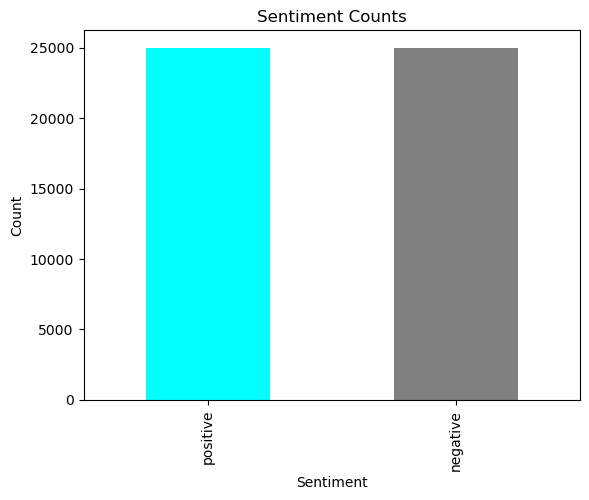

In [8]:
counts = data['sentiment'].value_counts().plot.bar(color=['cyan', 'gray'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [9]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
# Split the dataset into training and test sets
X = data['review']  # Text data
y = data['sentiment']  # Sentiment labels (0 for negative, 1 for positive)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#text normalization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [12]:
def text_normalize(text):
    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into normalized text
    normalized_text = ' '.join(tokens)
    
    return normalized_text

data['review'] = data['review'].apply(text_normalize)

In [13]:
from bs4 import BeautifulSoup
import re

In [14]:
def remove_html_noise(text):
    # Remove HTML tags using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Remove noise text using regular expressions
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with a space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'\'s', '', text)  # Remove possessive apostrophes
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    # Remove special characters using regular expressions
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove all non-alphanumeric characters except spaces

    return text

# Apply text normalization to the 'review' column in the dataframe
data['review'] = data['review'].apply(remove_html_noise)

In [15]:
data.head(10)

,review,sentiment
0,one reviewer mentioned watching oz episode ll ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunn...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comment film looking forwa...,negative
9,like original gut wrenching laughter like movi...,positive


In [16]:
print(data['review'][0])

one reviewer mentioned watching oz episode ll hooked right exactly happened me br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many  aryan muslim gangsta latino christian italian irish  scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show would nt dare forget pretty picture painted mainstream audience forget charm forget romance  oz nt mess around first episode ever saw struck nasty surreal could nt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard ll sold nickel inmate ll kill order get away well mannered middle class inmate turned prison bitch 

In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [18]:
# Create an instance of PorterStemmer
stemmer = PorterStemmer()

# Define a function for text stemming
def text_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform stemming on each word in the text
    stemmed_words = [stemmer.stem(word) for word in words]

    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Apply text stemming to the 'review' column in the dataframe
data['review'] = data['review'].apply(text_stemming)

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
# Load the NLTK stop words
stop_words = set(stopwords.words('english'))

# Define a function for stop word removal
def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

# Apply stop word removal to the 'clean_review' column in the dataframe
data['review'] = data['review'].apply(remove_stopwords)

In [21]:
print(stop_words)

{'as', 'above', 'weren', 'further', 'himself', 'where', 'from', 'all', 'until', 'other', 'no', 'in', 'its', 'but', 'out', "hadn't", 'itself', 'hasn', 'through', 'to', 'doing', 'and', "mightn't", "that'll", 'the', 'being', 'more', 'me', 'myself', 'did', 'mustn', 'needn', 'we', 'about', "wouldn't", "hasn't", 'once', "didn't", 'will', "needn't", 'they', 'whom', 'down', 'of', 'are', 're', "should've", 'wasn', 'themselves', 'nor', 'or', 'than', 'theirs', 'hadn', 'it', 'them', 'very', 'having', 'during', 'my', 'there', 'now', 'been', 'should', 'at', 'with', 'again', 'haven', 'didn', 'which', 'most', 'up', 'a', "you're", 'against', "isn't", 'why', 's', 'hers', 'ours', 'yours', 'wouldn', 'so', 'does', 'what', 'while', 'ourselves', "mustn't", 'shan', 'by', 'over', 'have', 'yourselves', 'this', 'aren', 'is', 'not', "wasn't", 'an', 'am', 'here', "shouldn't", 'on', 'can', "haven't", 'him', 'some', "weren't", 'ain', "aren't", 'his', 'who', 'o', 'couldn', 'same', 'our', 'if', 'off', 'after', 'he', '

In [22]:
# Create feature vectors for every sentence
vectorizer = TfidfVectorizer(min_df=2, 
                             max_df=0.8, 
                             max_features=5000, 
                             sublinear_tf=True, 
                             use_idf=True, 
                             stop_words='english')
data_vector = vectorizer.fit_transform(data['review'])

In [23]:
# Convert text data into numerical features using bag-of-words representation
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [24]:
print("Bag of Words-Train:" ,X_train_vectorized)
print("Bag of Words-Test:" ,X_test_vectorized)

Bag of Words-Train:   (0, 2490)	1
  (0, 318)	1
  (0, 1745)	1
  (0, 3890)	1
  (0, 2808)	1
  (0, 1909)	1
  (0, 2820)	1
  (0, 2901)	1
  (0, 4198)	1
  (0, 4491)	1
  (0, 1294)	1
  (0, 766)	1
  (0, 2664)	1
  (0, 1233)	1
  (0, 4782)	1
  (0, 2276)	1
  (0, 685)	1
  (0, 2062)	1
  (0, 2469)	2
  (0, 385)	1
  (0, 4977)	1
  (0, 1305)	2
  (0, 2055)	1
  (0, 449)	1
  (0, 4551)	1
  :	:
  (39999, 3582)	1
  (39999, 2168)	1
  (39999, 1352)	1
  (39999, 2705)	1
  (39999, 4653)	1
  (39999, 3519)	1
  (39999, 744)	1
  (39999, 3607)	1
  (39999, 1189)	1
  (39999, 611)	1
  (39999, 2432)	1
  (39999, 4575)	1
  (39999, 113)	3
  (39999, 1572)	1
  (39999, 1266)	1
  (39999, 2133)	1
  (39999, 2345)	1
  (39999, 3422)	1
  (39999, 3853)	1
  (39999, 1614)	1
  (39999, 1301)	1
  (39999, 2812)	1
  (39999, 4460)	1
  (39999, 1846)	1
  (39999, 1684)	1
Bag of Words-Test:   (0, 2)	1
  (0, 264)	1
  (0, 393)	2
  (0, 466)	1
  (0, 477)	1
  (0, 524)	1
  (0, 525)	1
  (0, 543)	1
  (0, 600)	1
  (0, 682)	1
  (0, 756)	1
  (0, 1243)	1
  (0, 12

In [25]:
y_train_tfidf =  y_train.replace({'positive': 1, 'negative': 0})
y_test_tfidf =  y_test.replace({'positive': 1, 'negative': 0})

In [26]:
#create a TfidfVectorizer object to converts a collection of text documents to a matrix of token counts
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))     

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.fit_transform(X_test)

In [27]:
# Print the shape of the feature matrix for train and test sets
print("Train data - X shape:", X_train_tfidf.shape)
print("Test data - X shape:", X_test_tfidf.shape)

# Print the shape of the target labels for train and test sets
print("Train data - y shape:", y_train_tfidf.shape)
print("Test data - y shape:", y_test_tfidf.shape)

Train data - X shape: (40000, 10000)
Test data - X shape: (10000, 10000)
Train data - y shape: (40000,)
Test data - y shape: (10000,)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,
lowercase=True,
use_idf=True,
norm='l2',
smooth_idf=True)
y = data.sentiment.values
X = tfidf.fit_transform(data.review)

In [37]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

In [28]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, LSTM, Dense
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

2023-05-10 06:31:05.267757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [38]:
# Train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_mat)

Accuracy: 0.85816
Confusion Matrix: [[10975  1499]
 [ 2047 10479]]


In [40]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_mat)

Accuracy: 0.88716
Confusion Matrix: [[10923  1551]
 [ 1270 11256]]


In [ ]:
# SVM
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test_tfidf, y_pred)
confusion_mat = confusion_matrix(y_test_tfidf, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_mat)

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [76]:
# Defining the NN model
model = Sequential()
model.add(Dense(20, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train
callbacks_list = [a
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
    X_train_tfidf.toarray(), y_train_tfidf, 
    epochs=25, 
    verbose=1,
    callbacks = callbacks_list,
    validation_data=(X_test_tfidf.toarray(), y_test_tfidf))

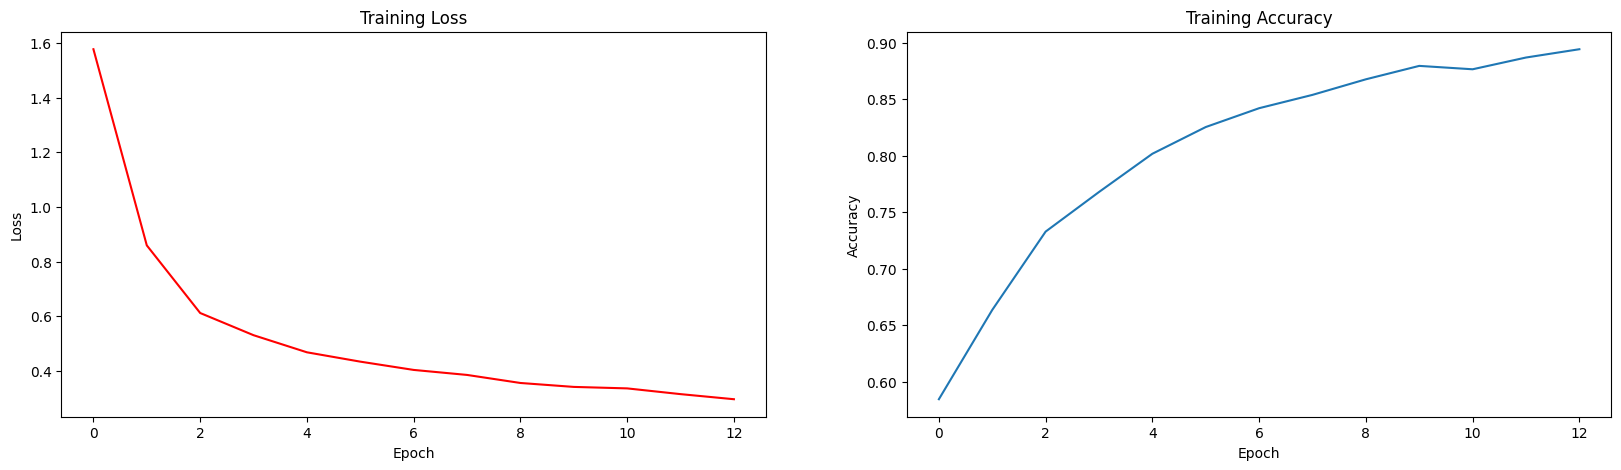

In [71]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history.history['loss'], color='red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(history.history['accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training Accuracy')

plt.show()

#### Let's try using the adam optimizer

In [80]:
# Defining the NN model
model1 = Sequential()
model1.add(Dense(20, input_shape=(X_train_tfidf.shape[1],), activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))
# compile network
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
callbacks_list1 = [
    keras.callbacks.ModelCheckpoint(
        filepath='model1.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history1 = model1.fit(
    X_train_tfidf.toarray(), y_train_tfidf, 
    epochs=25, 
    verbose=1,
    callbacks = callbacks_list1,
    validation_data=(X_test_tfidf.toarray(), y_test_tfidf))

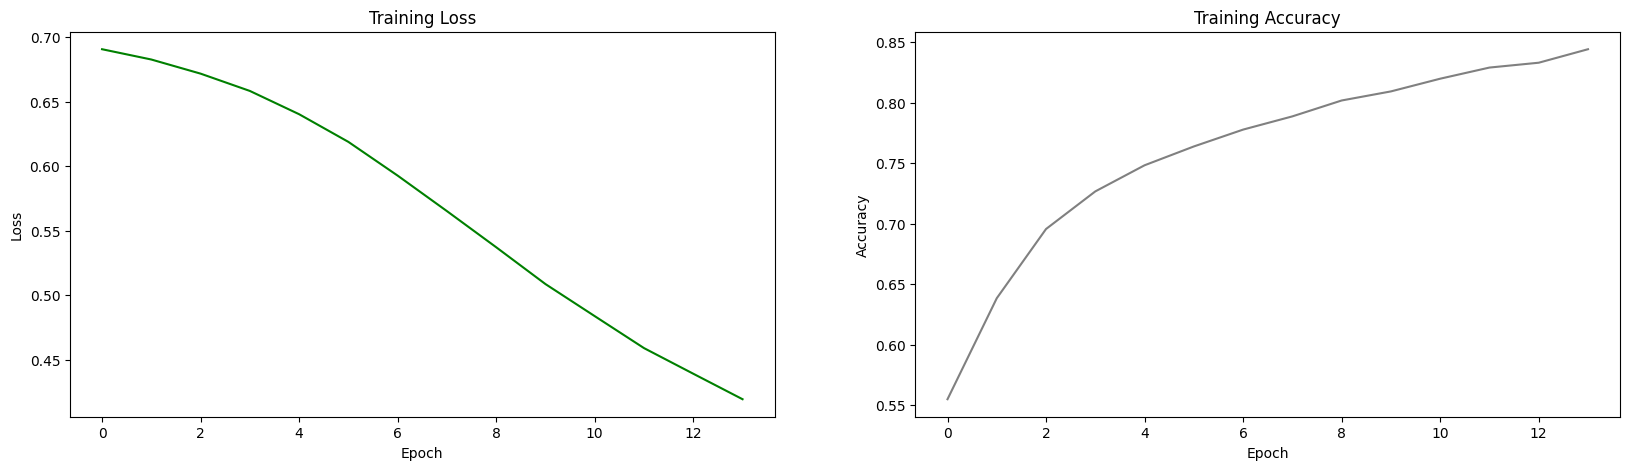

In [86]:
#Plots history of model training
plt.rcParams["figure.figsize"] = (20,5)
fig, axs = plt.subplots(1, 2)

axs[0].plot(history.history['loss'], color='green')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(history.history['accuracy'],color='gray')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training Accuracy')

plt.show()

### As it can be observed that 'adam' optimizer gives really good accuracy (98%) than 'sgd' optimizer (84%).

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize the input text data
train_tokens = tokenizer.batch_encode_plus(
    y_train['reviews'], 
    max_length=512, 
    padding='max_length', 
    truncation=True
)
test_tokens = tokenizer.batch_encode_plus(
    y_test['reviews'], 
    max_length=512, 
    padding='max_length', 
    truncation=True
)

# Convert the tokenized inputs into tensors
train_inputs = torch.tensor(train_tokens['input_ids'])
test_inputs = torch.tensor(test_tokens['input_ids'])

train_masks = torch.tensor(train_tokens['attention_mask'])
test_masks = torch.tensor(test_tokens['attention_mask'])

train_labels = torch.tensor(train_data['sentiments'].values)
test_labels = torch.tensor(test_data['sentiments'].values)

# Create the DataLoader objects
from torch.utils.data import TensorDataset, DataLoader

batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_loader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Train the model
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 4
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0, 
    num_training_steps=total_steps
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        inputs, masks, labels = tuple(t.to(device) for t in batch)
        model.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs[0]
        train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    
    # Evaluate the model on the test set after each epoch
    model.eval()
    with torch.no_grad():
        y_pred = []
        y_true = []
        for batch in test_loader:
            inputs, masks, labels = tuple(t.to(device) for t in batch)
            outputs = model(inputs, attention_mask=masks)
            logits = outputs[0]
            _, preds = torch.max(logits, dim=1)
            y_pred.extend(preds.cpu().numpy().tolist())
            y_true.extend(labels.cpu().numpy().tolist())
        accuracy = accuracy_score(y_true, y_pred)
        confusion_mat = confusion_matrix(y_true, y_pred)
        print('Epoch: {:02d}, Accuracy: {:.2f}%, Confusion Matrix: \n{}'.format(epoch+1, accuracy*100, confusion_mat))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

NameError: name 'y_train' is not defined

In [48]:
from keras.datasets import imdb

vocab_size = 5000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocab_size)

X_train, X_val = X_train[:-5000], X_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]

print(len(X_train), 'train sequences')
print(len(X_val), 'val sequences')
print(len(X_test), 'test sequences')


17464789/17464789 [==============================] - 0s 0us/step
20000 train sequences
5000 val sequences
25000 test sequences


In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


maximum_sequence_length = 500 # maximum length of all review sequences

X_train = pad_sequences(X_train, padding= 'post', maxlen= maximum_sequence_length)
X_val = pad_sequences(X_val, padding= 'post', maxlen= maximum_sequence_length)
X_test = pad_sequences(X_test, padding= 'post', maxlen= maximum_sequence_length)

print('X_train shape:', X_train.shape) # (n_samples, n_timesteps)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (20000, 500)
X_val shape: (5000, 500)
X_test shape: (25000, 500)


In [58]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
from keras.callbacks import EarlyStopping

embedding_dim = 16

def create_model(filters = 64, kernel_size = 3, strides=1, units = 256, 
                 optimizer='adam', rate = 0.25, kernel_initializer ='glorot_uniform'):
    model = Sequential()
    # Embedding layer
    model.add(Embedding(vocab_size, embedding_dim, input_length= maximum_sequence_length))
    # Convolutional Layer(s)
    model.add(Dropout(rate))
    model.add(Conv1D(filters = filters, kernel_size = kernel_size, strides= strides, 
                     padding='same', activation= 'relu'))
    model.add(GlobalMaxPooling1D())
    # Dense layer(s)
    model.add(Dense(units = units, activation= 'relu', kernel_initializer= kernel_initializer))
    model.add(Dropout(rate))
    # Output layer
    model.add(Dense(1, activation= 'sigmoid'))
    
    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer= optimizer,
                  metrics=['accuracy'])
    return model
# Build the model
model = KerasClassifier(build_fn= create_model)

In [64]:
# Set the hyperparameters
filters = [128] #[64, 128, 256]
kernel_size = [5] #[3, 5, 7]
strides= [1] # [1, 2, 5]
Dense_units = [128, 512]
kernel_initializer = ['TruncatedNormal'] #['zero', 'glorot_uniform', 'glorot_normal','TruncatedNormal']
rate_dropouts = [0.25] #[0.1, 0.25, 0.5]
optimizers = ['adam'] #['adam','rmsprop']
epochs = [5]
batches = [64] #[32, 64, 128]
# ----------------------------------------------
# Exhaustive Grid Search
param_grid = dict(optimizer= optimizers, epochs= epochs, batch_size= batches,
                  filters = filters, kernel_size = kernel_size, strides = strides, 
                  units = Dense_units, kernel_initializer= kernel_initializer, rate = rate_dropouts)

grid = ParameterGrid(param_grid)
param_sets = list(grid)

param_scores = []
for params in grid:

    print(params)
    model.set_params(**params)

    earlystopper = EarlyStopping(monitor='val_accuracy', patience= 0, verbose=1)
    
    history = model.fit(X_train, y_train,
                        shuffle= True,
                        validation_data=(X_val, y_val),
                        callbacks= [earlystopper])

    param_score = history.history['val_accuracy']
    param_scores.append(param_score[-1])
    print('+-'*50) 
    
    
param_scores = []
for p in params:
    print("Training with parameters:")
    print(p)
    model = model(p)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=p['epochs'], batch_size=p['batch_size'], callbacks=[early_stop])
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    param_scores.append(score)
    print('+-'*50) 

print('param_scores:', param_scores)
# Choose best parameters
best_score_index = np.argmax(np.array(param_scores))
print("best score:", param_scores[best_score_index])
print("best parameters:", params[best_score_index])


{'batch_size': 64, 'epochs': 5, 'filters': 128, 'kernel_initializer': 'TruncatedNormal', 'kernel_size': 5, 'optimizer': 'adam', 'rate': 0.25, 'strides': 1, 'units': 128}
Epoch 1/5
313/313 [==============================] - 7s 23ms/step - loss: 0.5797 - accuracy: 0.6562 - val_loss: 0.3799 - val_accuracy: 0.8286
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 0.3234 - accuracy: 0.8613 - val_loss: 0.2964 - val_accuracy: 0.8734
Epoch 2: early stopping
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
{'batch_size': 64, 'epochs': 5, 'filters': 128, 'kernel_initializer': 'TruncatedNormal', 'kernel_size': 5, 'optimizer': 'adam', 'rate': 0.25, 'strides': 1, 'units': 512}
Epoch 1/5
313/313 [==============================] - 7s 22ms/step - loss: 0.5407 - accuracy: 0.6870 - val_loss: 0.3499 - val_accuracy: 0.8482
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 0.2935 - accuracy: 0.8760 - val_los

TypeError: 'KerasClassifier' object is not callable

In [61]:
# Choose best parameters
p = np.argmax(np.array(param_scores))
best_params = param_sets[p]
print("best parameter set", best_params)

ValueError: attempt to get argmax of an empty sequence

In [ ]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 200

In [71]:
print('Build model...')
model = Sequential()
model.add(Embedding(20000, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # 128 = dimensionality of the output space
model.add(Dense(1, activation='sigmoid')) 

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [72]:
print('Train...')
model.fit(X_train, y_train,
          batch_size=200,
          epochs=3,
          validation_data=(X_test, y_test))

Train...
Epoch 1/3
100/100 [==============================] - 120s 1s/step - loss: 0.6928 - accuracy: 0.5017 - val_loss: 0.6919 - val_accuracy: 0.5070
Epoch 2/3
100/100 [==============================] - 111s 1s/step - loss: 0.6869 - accuracy: 0.5185 - val_loss: 0.6917 - val_accuracy: 0.5044
Epoch 3/3
100/100 [==============================] - 109s 1s/step - loss: 0.6729 - accuracy: 0.5276 - val_loss: 0.6877 - val_accuracy: 0.5140


In [73]:
score, acc = model.evaluate(X_test, y_test, batch_size=200)

print('Test score:', score)
print('Test accuracy:', acc)

125/125 [==============================] - 31s 248ms/step - loss: 0.6877 - accuracy: 0.5140
Test score: 0.6877120137214661
Test accuracy: 0.5139999985694885


In [76]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.10.10
IPython version      : 8.10.0

numpy       : 1.22.3
pandas      : 1.5.3
torch       : 2.0.0
transformers: 4.28.1



In [77]:

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [93]:
def to_sentiment(rating):
  rating = str(rating)
  if rating == 'positive':
    return 0
  else: 
    return 1

data['sentiment_score'] = data.sentiment.apply(to_sentiment)

In [78]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [79]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [81]:
token_lens = []

for txt in data.review:
  tokens = tokenizer.encode(txt, max_length=512, truncation=True)
  token_lens.append(len(tokens))

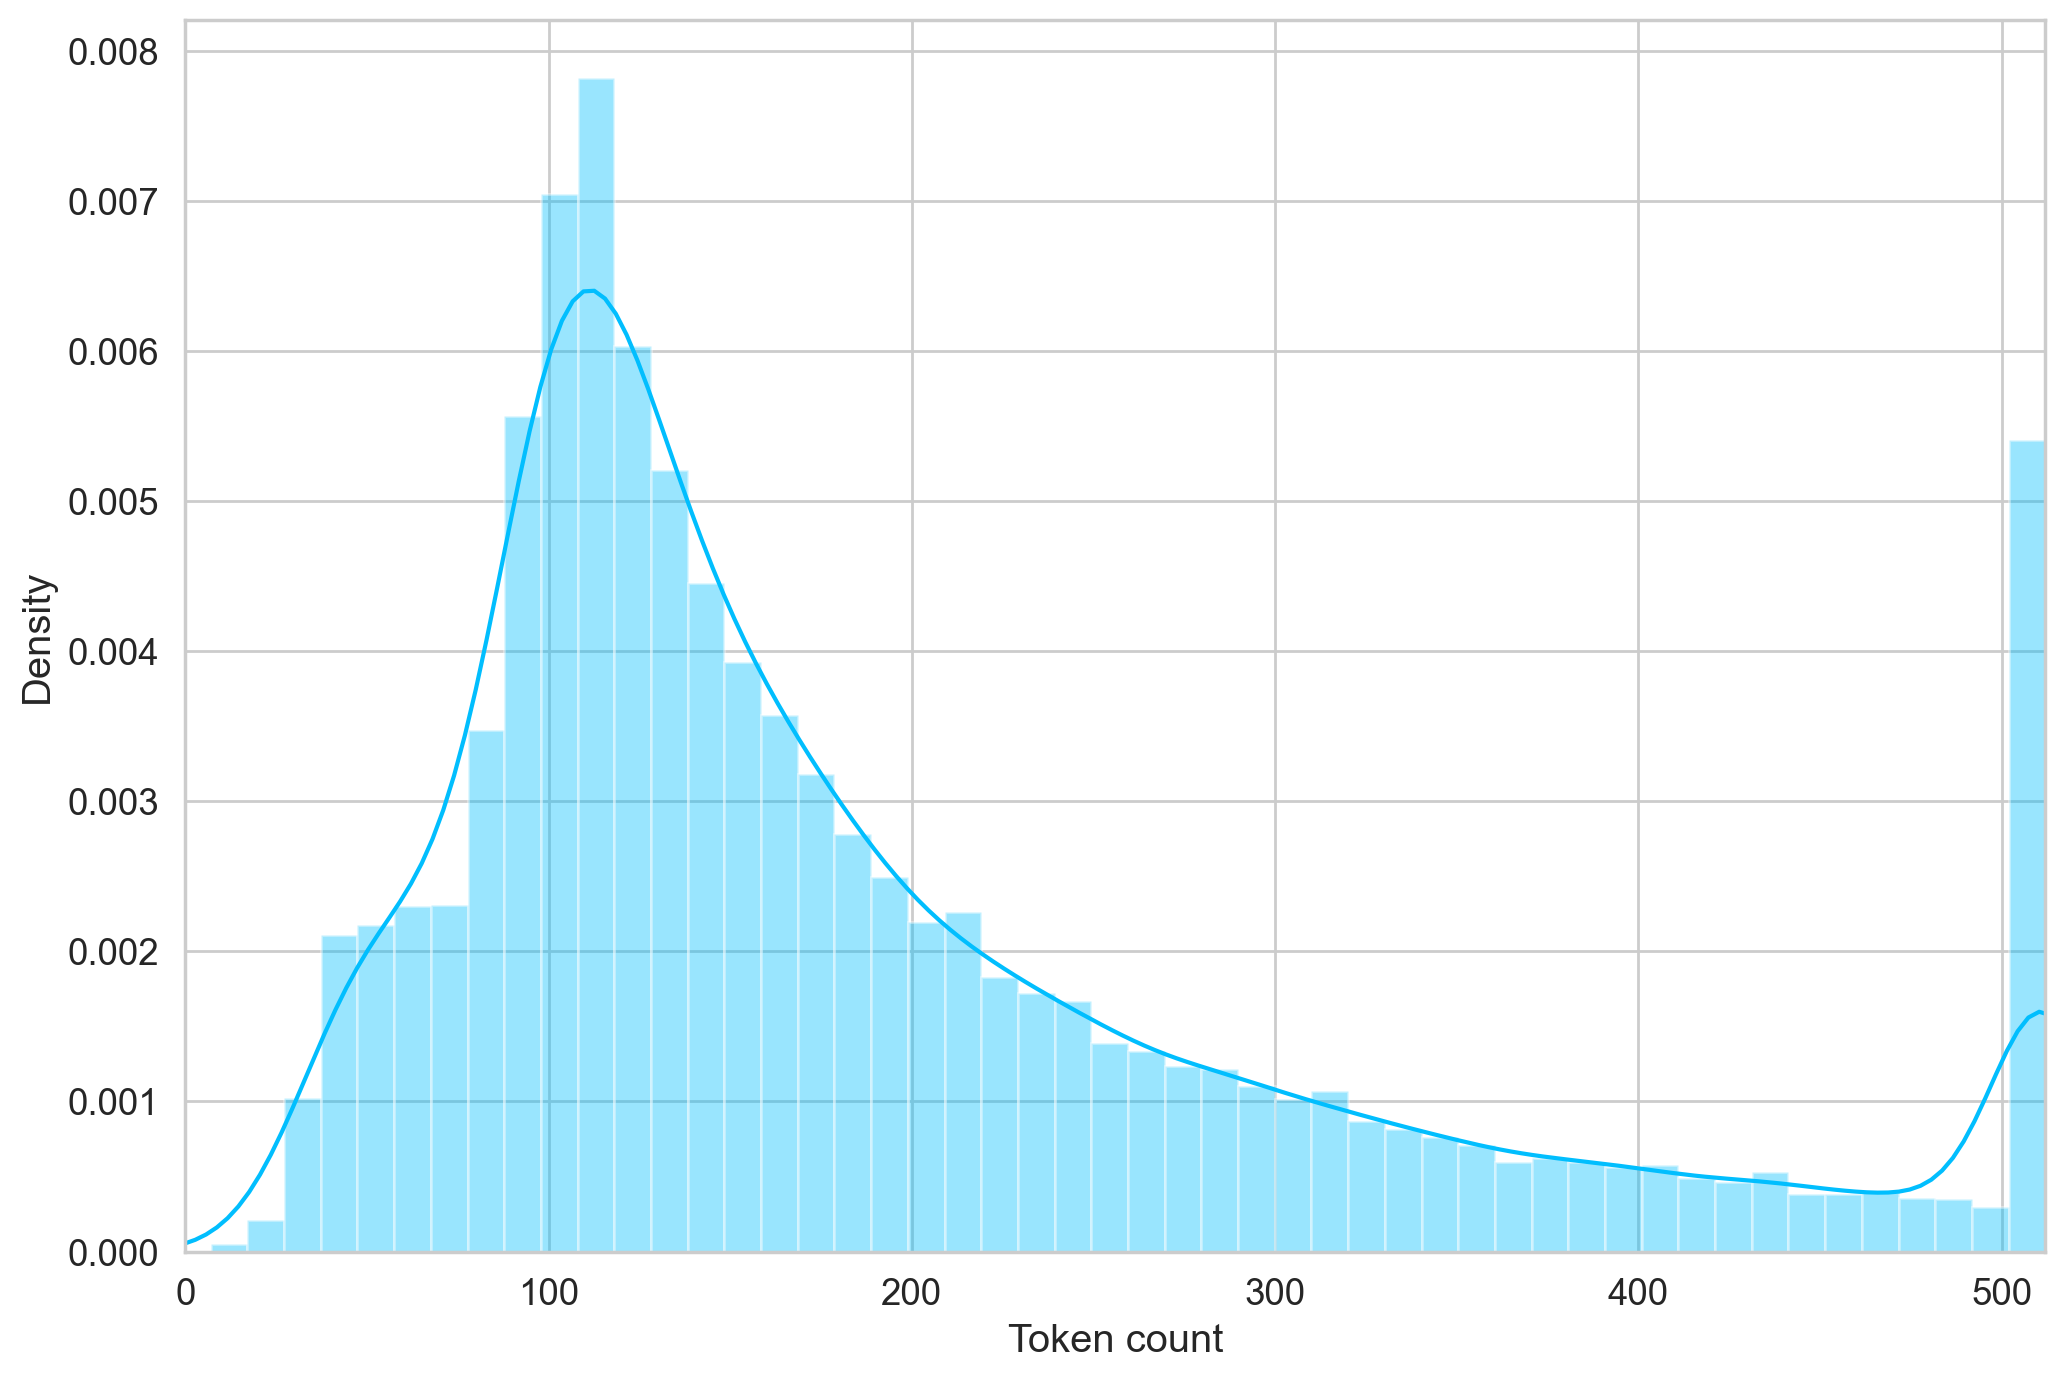

In [82]:
sns.distplot(token_lens)
plt.xlim([0, 512]);
plt.xlabel('Token count');
     

In [83]:
MAX_LEN = 400

In [106]:
class MovieReviewDataset(Dataset):

    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
          review,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt',
          truncation = True
        )

        return {
          'review_text': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
        }



In [107]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
data_val, data_test = train_test_split(data_test, test_size=0.4, random_state=RANDOM_SEED)
     

In [108]:
data_train.shape, data_val.shape, data_test.shape

((40000, 3), (6000, 3), (4000, 3))

In [109]:

def create_data_loader(df, tokenizer, max_len, batch_size):
    
    ds = MovieReviewDataset(
    reviews=df.review.to_numpy(),
    targets=df.sentiment_score.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
    )

    return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
    )

In [110]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(data_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(data_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(data_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/shivanipatel/anaconda3/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/Users/shivanipatel/anaconda3/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'MovieReviewDataset' on <module '__main__' (built-in)>


In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [ ]:
last_hidden_state.shape

In [ ]:
bert_model.config.hidden_size